In [73]:
import pandas as pd
import numpy as np 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
trainX = train.iloc[:,1:]
trainY = train.iloc[:,0]
testX = test



#Normalize
trainX = trainX/255.0
testX = testX/255.0






In [44]:
#See how well it does
measureTrainX = trainX[:35000]
measureTrainY = trainY[:35000]
measureValX = trainX[35000:].reset_index(drop=True)
measureValY = trainY[35000:].reset_index(drop=True)

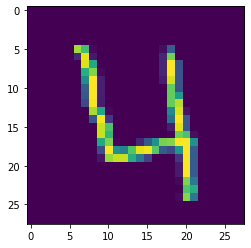

In [49]:
import matplotlib.pyplot as plt
import numpy as np
sample = np.reshape(trainX.iloc[3,:].to_numpy(),(28,28))
sample = sample*255
plt.imshow(sample)

In [58]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
convertedTrain = pca.fit_transform(measureTrainX)
convertedVal = pca.transform(measureValX)
convertedTrain.shape

(35000, 3)

In [59]:
colors = ['blue','red', 'green', 'black', 'yellow', 'purple', 'pink', 'cyan', 'orange', 'white']

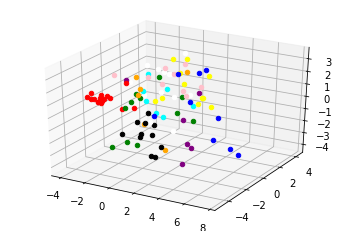

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(convertedTrain[i][0], convertedTrain[i][1],convertedTrain[i][2], c = colors[measureTrainY[i]])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf.fit(convertedTrain,measureTrainY)

KNeighborsClassifier(metric='euclidean')

In [63]:
clf.score(convertedVal, measureValY)

0.47985714285714287

In [64]:
def kNearNeighborsDims(pcaDims, nNeighbors):
    pca = PCA(n_components = pcaDims)
    convertedTrain = pca.fit_transform(measureTrainX)
    convertedVal = pca.transform(measureValX)
    clf = KNeighborsClassifier(n_neighbors=nNeighbors, metric='euclidean')
    clf.fit(convertedTrain,measureTrainY)
    score = clf.score(convertedVal,measureValY)
    print("PCA dims: ", pcaDims, "nNeighbors: " , nNeighbors, "Score: ", score)
    return score

PCA dims:  1 nNeighbors:  5 Score:  0.2764285714285714
PCA dims:  2 nNeighbors:  5 Score:  0.42214285714285715
PCA dims:  3 nNeighbors:  5 Score:  0.48014285714285715
PCA dims:  4 nNeighbors:  5 Score:  0.6281428571428571
PCA dims:  5 nNeighbors:  5 Score:  0.7361428571428571
PCA dims:  6 nNeighbors:  5 Score:  0.824
PCA dims:  7 nNeighbors:  5 Score:  0.8634285714285714
PCA dims:  8 nNeighbors:  5 Score:  0.8975714285714286
PCA dims:  9 nNeighbors:  5 Score:  0.9112857142857143
PCA dims:  10 nNeighbors:  5 Score:  0.9251428571428572
PCA dims:  11 nNeighbors:  5 Score:  0.9328571428571428
PCA dims:  12 nNeighbors:  5 Score:  0.9415714285714286
PCA dims:  13 nNeighbors:  5 Score:  0.9504285714285714
PCA dims:  14 nNeighbors:  5 Score:  0.955
PCA dims:  15 nNeighbors:  5 Score:  0.9574285714285714
PCA dims:  16 nNeighbors:  5 Score:  0.9617142857142857
PCA dims:  17 nNeighbors:  5 Score:  0.9624285714285714
PCA dims:  18 nNeighbors:  5 Score:  0.9638571428571429
PCA dims:  19 nNeighbors:

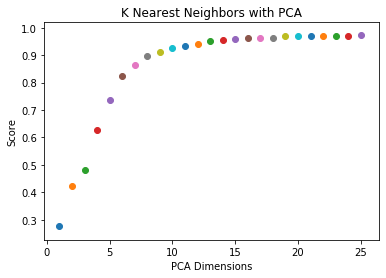

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel = "PCA Dimensions", ylabel = "Score", title = "K Nearest Neighbors with PCA")

scores = []
for i in range(25):
    
    ax.scatter(i+1, kNearNeighborsDims(i+1, 5))
    
    


In [94]:
#Time to use all training data and submit predictions

pca = PCA(n_components = 60)
convertedTrain = pca.fit_transform(trainX)
convertedTest = pca.transform(testX)
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf.fit(convertedTrain,trainY)
predictions = clf.predict(convertedTest)


In [95]:
f = open("predictions.txt", "w")
f.write("ImageId,Label\n")
for i,pred in enumerate(predictions):
    
    f.write(str(i+1)+","+str(pred)+"\n")
f.close()

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
